This script visualizes daily temperatures calculated using driver data from the example folder and measured data from the corresponding permafrost monitoring station. 

In [162]:
%matplotlib inline
import numpy as np
import pandas as pd
import subprocess
from matplotlib import pyplot as plt
import yaml
import os
from pathlib import Path
GIPL_PATH = Path(f"{os.getcwd()}")


For some years snow depth needd to corrected to match warm tempratures in the sping. Tair>0 -> no snow. 

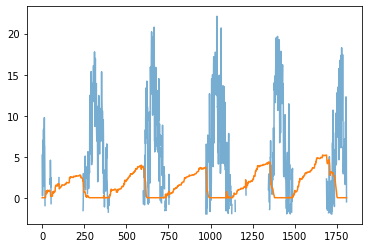

In [79]:
ubound_file='in/bound.txt'
ubound = np.loadtxt(ubound_file, skiprows=1,  unpack=False)
df_tair = pd.DataFrame(ubound[:,-1:], columns=['Tair [C]']) 

snow_file='in/snow.txt'
dsnow = np.loadtxt(snow_file, skiprows=1,  unpack=False)
df_dsnow = pd.DataFrame(dsnow[:,-1:], columns=['snow depth[m]']) 

rsnow_file='in/rsnow.txt'
rsnow = np.loadtxt(rsnow_file, skiprows=1,  unpack=False)
df_rsnow = pd.DataFrame(rsnow[:,-1:], columns=['snow cond[W/m/K]']) 

plt.plot(df_tair[df_tair>-2], alpha=0.6)
plt.plot(df_dsnow*10)

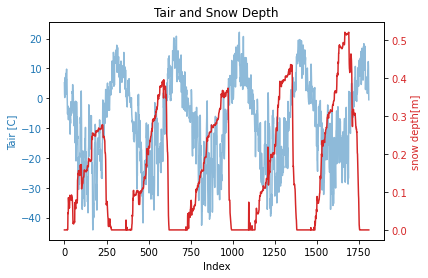

In [71]:
# Ensure that the indices match or align them if necessary
df_tair.index = pd.RangeIndex(start=0, stop=len(df_tair), step=1)
df_dsnow.index = pd.RangeIndex(start=0, stop=len(df_dsnow), step=1)

# Create the plot with two y-axes
fig, ax1 = plt.subplots()

# Plot the first dataset on the primary y-axis
ax1.plot(df_tair.index, df_tair['Tair [C]'], color='tab:blue', alpha=0.5)
ax1.set_xlabel('Index')
ax1.set_ylabel('Tair [C]', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis and plot the second dataset
ax2 = ax1.twinx()
ax2.plot(df_dsnow.index, df_dsnow['snow depth[m]'], color='tab:red')
ax2.set_ylabel('snow depth[m]', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title and show the plot
plt.title('Tair and Snow Depth')
plt.show()

Load calculated and measured temperatures. 

In [91]:
def load_calc():
    calc_file='out/result.txt'
    calc_data = np.loadtxt(calc_file, skiprows=0,  unpack=False)
    calc_header=['id','time','Tair','snow','0.01m', '0.08m', '0.13m', '0.24m', '0.38m', '0.53m', '0.67m' ]
    df = pd.DataFrame(calc_data, columns=calc_header) 
    return df

def load_meas():
    meas_file='mesres.txt'
    df_meas =  np.loadtxt(meas_file, skiprows=0,  unpack=False)#pd.read_csv(meas_file)
    df = pd.DataFrame(df_meas, columns=['0.01m', '0.08m', '0.13m', '0.24m', '0.38m', '0.53m', '0.67m'])
    return df

df_calc=load_calc()
df_meas=load_meas()

Text(0.5, 1.0, 'Calculated ground temperatures ')

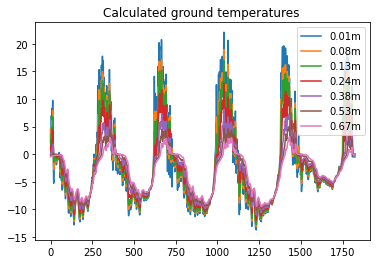

In [92]:
df_calc[['0.01m', '0.08m', '0.13m', '0.24m', '0.38m', '0.53m', '0.67m']].plot()
plt.title('Calculated ground temperatures ')

Text(0.5, 1.0, 'Measured ground temperatures ')

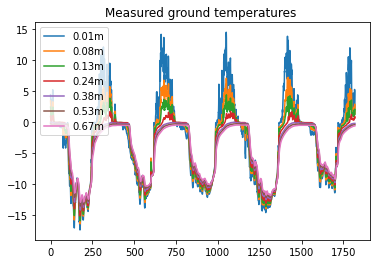

In [81]:
df_meas.plot()
plt.title('Measured ground temperatures ')

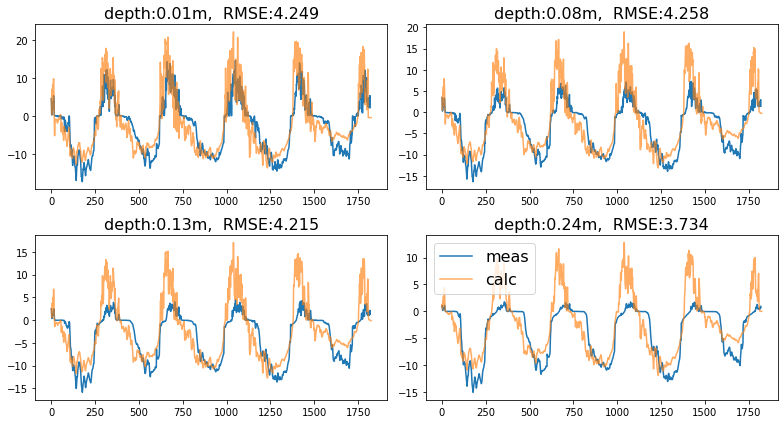

In [110]:
def plot_ground_temps(hh):
    df_calc=load_calc()  #update calculated data
    [ndays,ncols]=df_calc.shape
    df_meas=load_meas() 
    #match the number of days in meas with calc
    df_meas=df_meas.iloc[:ndays,:]

    fig = plt.figure()
    fig.set_figheight(6); fig.set_figwidth(11)
    for i,ih in zip(range(4),hh):
        RMSE=np.sqrt(np.mean((df_meas[ih]-df_calc[ih])**2))
        fig.add_subplot(2,2,i+1)
        plt.title('depth:'+str(ih)+',  RMSE:'+str(round(RMSE,3)),fontsize=16 )
        plt.plot(df_meas[ih])
        plt.plot(df_calc[ih],alpha=0.65)
    plt.legend(['meas','calc'],fontsize=16)
    fig.tight_layout()

subprocess.call(["./gipl"])
hh=['0.01m', '0.08m', '0.13m', '0.24m']
plot_ground_temps(hh)

### Working with 1 year dataset
chage end date in the gipl_config.cfg to 1.  

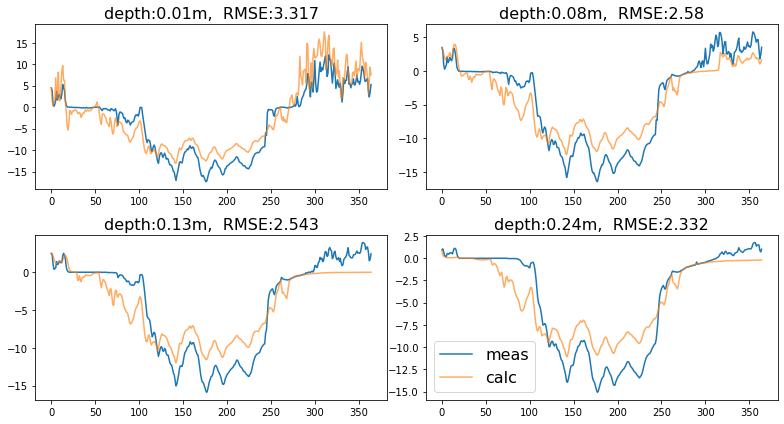

In [220]:
subprocess.call(["./gipl"])
hh=['0.01m', '0.08m', '0.13m', '0.24m']
plot_ground_temps(hh)

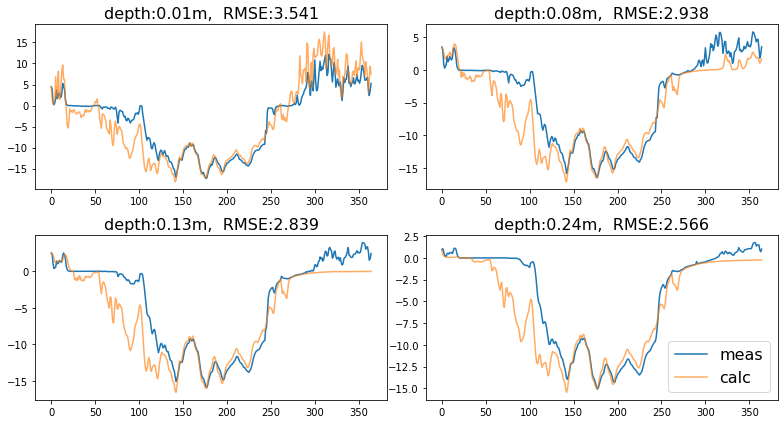

In [222]:
subprocess.call(["./gipl"])
hh=['0.01m', '0.08m', '0.13m', '0.24m']
plot_ground_temps(hh)

<AxesSubplot:>

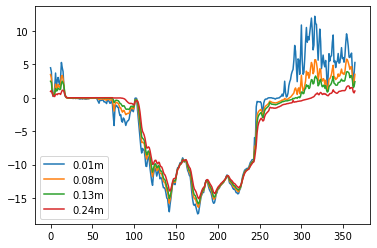

In [122]:
df_meas=load_meas() 
df_meas.iloc[:ndays,:4].plot()

## Sensitivity analysis example 

In [136]:
def load_icalc(outpath):
    calc_file=outpath / "out/result.txt"
    print(calc_file)
    calc_data = np.loadtxt(calc_file, skiprows=0,  unpack=False)
    calc_header=['id','time','Tair','snow','0.01m', '0.08m', '0.13m', '0.24m', '0.38m', '0.53m', '0.67m' ]
    df = pd.DataFrame(calc_data, columns=calc_header) 
    return df

def read_yaml():
    with open("config.yaml") as config_file:
        try:
            config = yaml.safe_load(config_file)
            return config
        except yaml.YAMLError as exc:
            print(exc)

def parse_config(config_data):
    perturbation_range = config_data.get("perturbation_range")
    n_samples = config_data.get("n_samples")
    data_matrix = config_data.get("data")[0]

    return perturbation_range, n_samples, data_matrix

perturbation_range, n_samples, data = parse_config(read_yaml())

/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_0/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_1/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_2/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_3/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_4/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_5/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_6/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_7/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_8/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_9/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_10/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_11/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_12/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_13/out/result.txt
/Users/EJafarov/projects/GIPl_1/GIPL/sa_runs/gipl_14/out/r

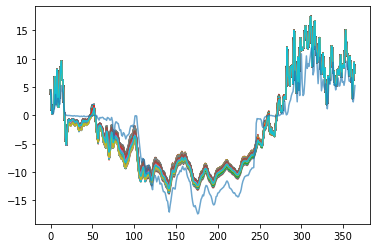

In [200]:
# run sensitivity analysis script
#!python sa_for_gipl.py
# read number of sample from config.yaml
perturbation_range, n_samples, data = parse_config(read_yaml())
# plot all samples for a given depth
rmse=[]
for sample in range(n_samples):
    isample="sa_runs/gipl_"+str(sample)
    ipath=GIPL_PATH / isample
    ires=load_icalc(ipath)
    rmse.append(np.sqrt(np.mean((ires["0.01m"]-df_meas["0.01m"].iloc[:365])**2)))
    plt.plot(ires["0.01m"])
plt.plot(df_meas["0.01m"].iloc[:365],alpha=0.65)    

In [201]:
#min(rmse)
val, idx = min((val, idx) for (idx, val) in enumerate(rmse))
val, idx

(3.2193485233348818, 65)

In [202]:
cat sa_runs/gipl_65/in/mineral.txt

 1
1  6
0.44	0.07	-0.19	2600000.0	1600000.0	0.05	3.18	0.05
0.48	0.001	-0.9	2600000.0	2400000.0	1.2	2.03	0.15
0.44	0.06	-0.6	2600000.0	2400000.0	0.59	2.13	0.6
0.17	0.06	-0.324	2900000.0	2000000.0	0.58	2.52	7.04
0.28	0.018	-0.109	3100000.0	2000000.0	1.78	2.04	17.0
0.05	0.067	-0.215	3000000.0	2500000.0	2.45	2.62	8.0


In [190]:
cat sa_runs/gipl_99/in/mineral.txt

 1
1  6
0.39	0.07	-0.19	2600000.0	1600000.0	0.05	2.13	0.05
0.41	0.001	-0.9	2600000.0	2400000.0	0.66	2.41	0.15
0.38	0.06	-0.6	2600000.0	2400000.0	1.21	2.13	0.6
0.35	0.06	-0.324	2900000.0	2000000.0	1.42	2.52	7.04
0.28	0.018	-0.109	3100000.0	2000000.0	1.78	2.04	17.0
0.05	0.067	-0.215	3000000.0	2500000.0	2.45	2.62	8.0


In [174]:
cat sa_runs/gipl_0/in/mineral.txt

 1
1  6
0.39	0.07	-0.19	2600000.0	1600000.0	0.05	5.92	0.05
0.41	0.001	-0.9	2600000.0	2400000.0	0.812	2.03	0.15
0.38	0.06	-0.6	2600000.0	2400000.0	1.21	2.13	0.6
0.35	0.06	-0.324	2900000.0	2000000.0	1.42	2.52	7.04
0.28	0.018	-0.109	3100000.0	2000000.0	1.78	2.04	17.0
0.05	0.067	-0.215	3000000.0	2500000.0	2.45	2.62	8.0


In [175]:
cat sa_runs/gipl_10/in/mineral.txt

 1
1  6
0.39	0.07	-0.19	2600000.0	1600000.0	0.05	5.44	0.05
0.41	0.001	-0.9	2600000.0	2400000.0	0.812	2.03	0.15
0.38	0.06	-0.6	2600000.0	2400000.0	1.21	2.13	0.6
0.35	0.06	-0.324	2900000.0	2000000.0	1.42	2.52	7.04
0.28	0.018	-0.109	3100000.0	2000000.0	1.78	2.04	17.0
0.05	0.067	-0.215	3000000.0	2500000.0	2.45	2.62	8.0
